# Statement of the Problem

Attrition refers to departure of staff for any reason from a company. The following dataset is a list of company staff over several years. The company is looking to reduce the rate of attrition. Using python perform exploratory data analysis(EDA) and give 8 useful information/insight that can help the company reduce the rate of attrition.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
df = pd.read_csv("combined_attr.csv")

# Show Max Columns

In [3]:
pd.options.display.max_columns =26

In [4]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2,2,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2,3,4
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8,2,3


# Data Preprocessing

### What is the number of rows and columns?

In [5]:
df.shape

(4410, 26)

### What is the datatypes of the columns?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

### Missing Values?


In [7]:
#sum of missing values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [8]:
df.isnull().values.any()

True

The column, "NumCompaniesWorked" has 19 missing values. Since were not going use it for any analysis, we'd leave it.

### What is the statistics summary of the whole dataset?

In [9]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2.729932,3.153741
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,0.711400,0.360742
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000


## Attrition?

1a) Count of employees who have stayed and have left the company?

b) Percent count of employees who have stayed and have left the company?

In [10]:
#1a) Count of employees who have stayed and have left the company?

df["Attrition"].value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

In [11]:
#b) Percent count of employees who have stayed and have left the company?
df["Attrition"].value_counts(normalize = True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

The result shows that 711, that is 16% of the employees have left the company. While 3699, that is 84% of the employees are still working the company.

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

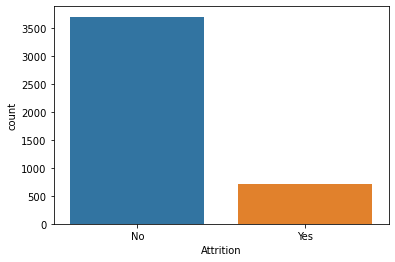

In [12]:
# Let's visualize the result
sns.countplot(df["Attrition"])

### We are going to create dummy variables for our Attrition column to convert it to an interger for better analysis.

In [13]:
attrition_dummies = pd.get_dummies(df["Attrition"])
attrition_dummies.head()

,No,Yes
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


From the above output

Note:

1) If an employee was attrited in the "Yes" column it is going to be 1 else 0

2)If an employee was attrited in the "No" column, it is going to 0 and else 1.

In [14]:
## Concatenate this dummy variable to the original dataframe
## Drop the one of the columns since they basically mean the same thing. We'd drop the "No" column

df = pd.concat([df, attrition_dummies], axis = 1)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,No,Yes
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,...,Y,11,8,0,1.0,6,1,0,0,3,3,1,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,...,Y,23,8,1,6.0,3,5,1,4,2,4,0,1
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,...,Y,15,8,3,5.0,2,5,0,3,3,3,1,0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,...,Y,11,8,3,13.0,5,8,7,5,2,3,1,0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,...,Y,12,8,2,9.0,2,6,0,4,3,3,1,0


In [15]:
df = df.drop(["Attrition", "No"], axis = 1)
df.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,Yes
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3,3,0
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,4,1
2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,3,0
3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,2,3,0
4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,3,3,0


## Questions

1. Employee attrition with respect to gender.
2. Employee attrition with respect to Business Travel.
3. Employee attrition with respect to Department.
4. Employee attrition with respect to Marital Status.
5. Employee attrition with respect to Age.
6. Employee attrition with respect to Job Involvement.
7. Employee attrition with respect to Education Field.
8. Employee attrition with respect to Job role.

### 1. Employee attrition with respect to gender.

Text(0.5, 1.0, 'Employee attrition with respect to gender')

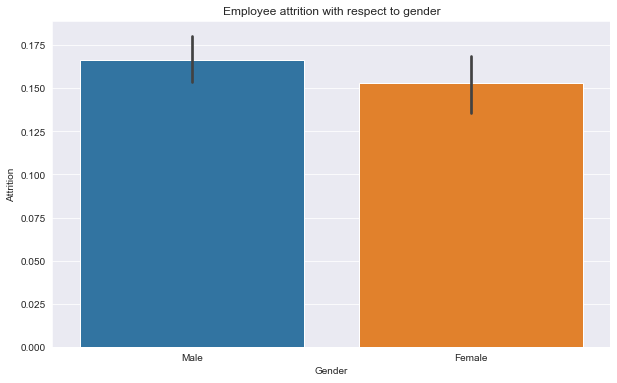

In [16]:
fig = plt.figure(figsize = (10, 6))
ax= sns.set_style("darkgrid")
ax = sns.barplot(x = "Gender", y= "Yes", data = df, order=["Male", "Female"], ci = 95)
ax.set(xlabel="Gender", ylabel = "Attrition")
plt.title("Employee attrition with respect to gender")

Insight:
Male employees left the company than females

### 2. Employee attrition with respect to Business Travel

Text(0.5, 1.0, 'Employee attrition with respect to Business Travel')

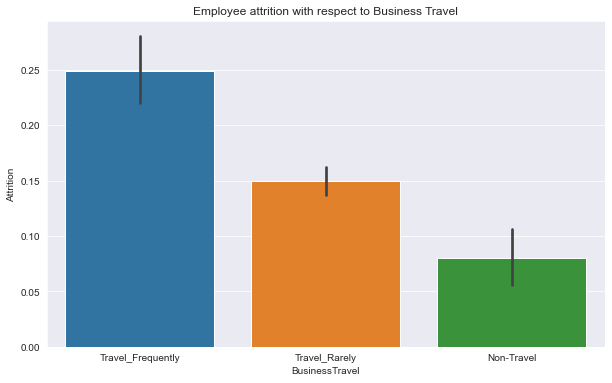

In [17]:
fig = plt.figure(figsize = (10, 6))
ax= sns.set_style("darkgrid")
ax = sns.barplot(x = "BusinessTravel", y= "Yes", data = df, order=["Travel_Frequently", "Travel_Rarely", "Non-Travel"], ci = 95)
ax.set(xlabel="BusinessTravel", ylabel = "Attrition")
plt.title("Employee attrition with respect to Business Travel")

Insight:

Employees who travelled frequently for business left the company more than those who didn't.

### 3. Employee attrition with respect to Department

Text(0.5, 1.0, 'Employee attrition with respect to Department')

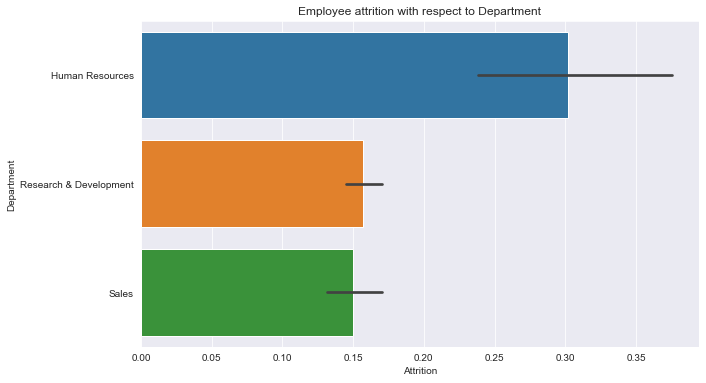

In [18]:
fig = plt.figure(figsize = (10, 6))
ax= sns.set_style("darkgrid")
ax = sns.barplot(x = "Yes", y= "Department", data = df, order=["Human Resources", "Research & Development", "Sales"], ci = 95)
ax.set(ylabel="Department", xlabel = "Attrition")
plt.title("Employee attrition with respect to Department")

Insight:

Employees who worked in the Human Resources Department left the company more than those in other the departments.

### 4. Employee attrition with respect to Marital Status

Text(0.5, 1.0, 'Employee attrition with respect to Marital Status')

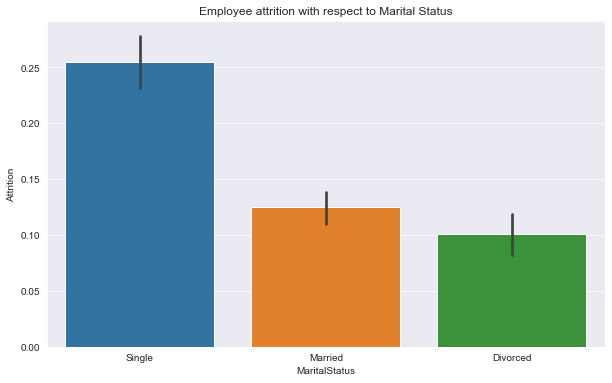

In [19]:
fig = plt.figure(figsize = (10, 6))
ax= sns.set_style("darkgrid")
ax = sns.barplot(y = "Yes", x= "MaritalStatus", data = df,order=["Single", "Married", "Divorced"], ci = 95)
ax.set(xlabel="MaritalStatus", ylabel = "Attrition")
plt.title("Employee attrition with respect to Marital Status")

Insight:

Employees who are the single have a higher attrition rate.

### 5. Employee attrition with respect to Age

Text(0.5, 1.0, 'Employee attrition with respect to Age')

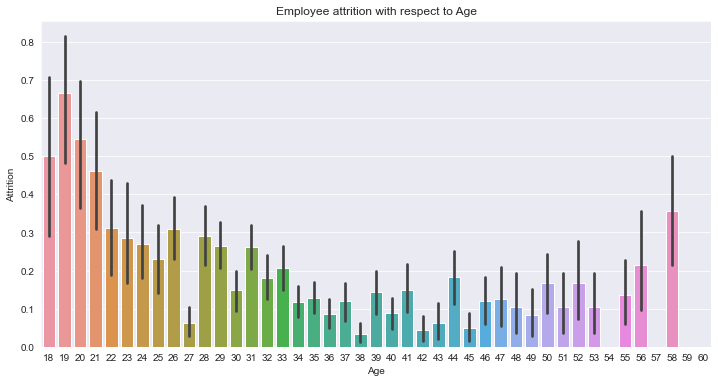

In [20]:
fig = plt.figure(figsize = (12, 6))
ax= sns.set_style("darkgrid")
ax = sns.barplot(x = "Age", y= "Yes", data = df, ci = 95)
ax.set(xlabel="Age", ylabel = "Attrition")
plt.title("Employee attrition with respect to Age")

Insight:

The attrition rate for employees between the ages of 18 to 31 and 58(retirement) is higher than for those in other age groups.

### 6. Employee attrition with respect to Job Involvement

Text(0.5, 1.0, 'Employee attrition with respect to Job Involvement')

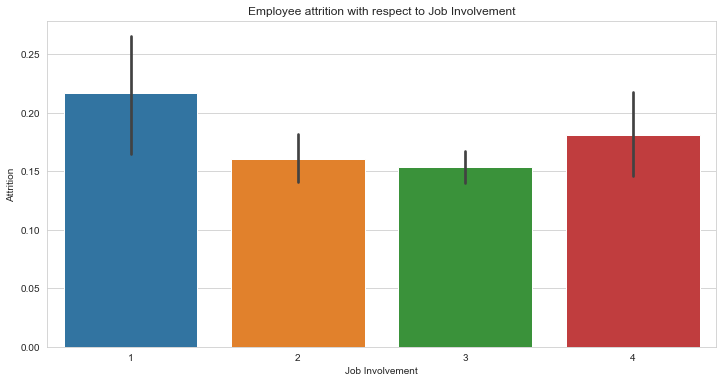

In [21]:
fig = plt.figure(figsize = (12, 6))
ax= sns.set_style("whitegrid")
ax = sns.barplot(x = "JobInvolvement", y= "Yes", data = df, ci = 95)
ax.set(xlabel="Job Involvement", ylabel = "Attrition")
plt.title("Employee attrition with respect to Job Involvement")

Insight:

The attrition rate for employees who were least involved in their jobs and those who were more involved in the job is higher.

### 7. Employee attrition with respect to Education Field.

Text(0.5, 1.0, 'Employee attrition with respect to Education Field')

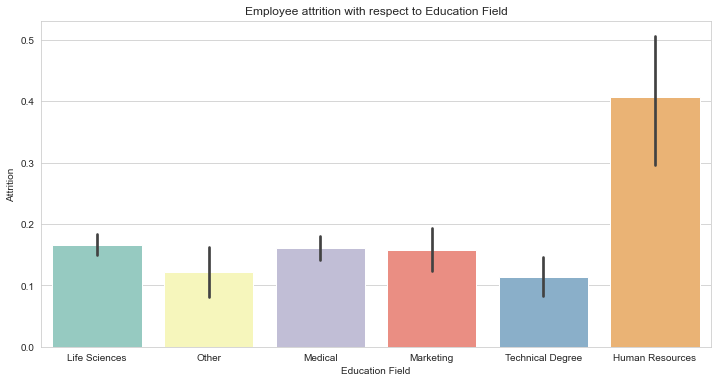

In [28]:
fig = plt.figure(figsize = (12, 6))
ax= sns.set_style("whitegrid")
ax = sns.barplot(x = "EducationField", y= "Yes", data = df, ci = 95)
ax.set(xlabel="Education Field", ylabel = "Attrition")
plt.title("Employee attrition with respect to Education Field")

Insight:

The attrition rate for employees who field of study was the Human resources is higher than for those in other fields.

### 8. Employee attrition with respect to Job Role

Text(0.5, 1.0, 'Employee attrition with respect to Job Role')

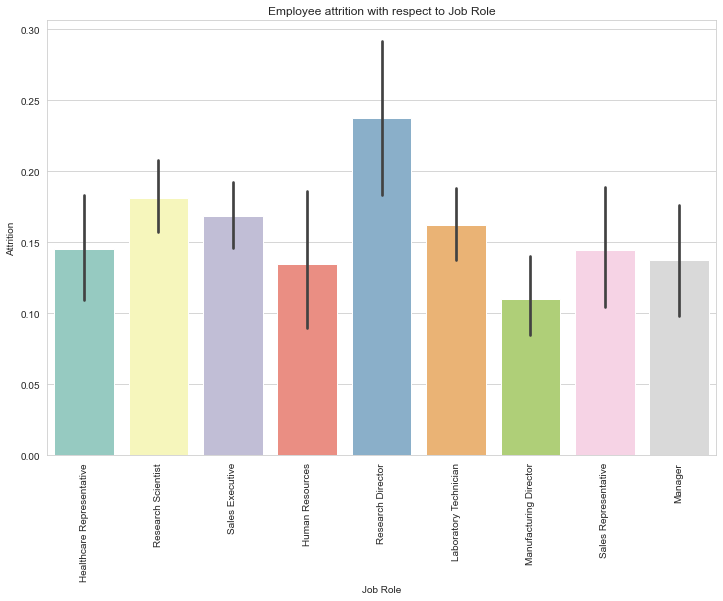

In [23]:
fig = plt.figure(figsize = (12, 8))
ax= sns.set_palette("Set3")
ax= sns.set_style("whitegrid")
ax = sns.barplot(x = "JobRole", y= "Yes", data = df, ci = 95)
ax.set(xlabel="Job Role", ylabel = "Attrition")
plt.xticks(rotation =90)
plt.title("Employee attrition with respect to Job Role")

Insight:

With regards to the job role, the attrition rate is for the Research Directors office than any other role.

## Summary and Recommendations

1. To be able to truly predict which variable influences attrition,various predictive models 
which is based on artificial neural networks, DT, Bayesian method, logistic regression, SVM, etc., can be employed.

2. With this analysis(to a degree), the organization can choose the employees with the utmost chances of leaving the organization 
and then assign them confined incentives